In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interactive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from IPython.display import HTML
from matplotlib import animation, rc
import matplotlib.animation as ani
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import pyfolio as pf
%matplotlib inline

In [2]:
sector = {'Basic materials': ['VMC', 'VALE', 'SCCO', 'RIO', 'PKX', 'IFF', 'MT', 'LIN', 'BHP', 'BBL'],
          'Communication service': ['WPP', 'VZ', 'TU', 'RELX', 'OMC', 'NFLX', 'GOOG', 'EA', 'DISCA', 'DIS'],
          'Consumer cyclical' : ['TM', 'SBUX', 'NKE', 'MCD', 'LVS', 'HD', 'GM', 'FORD', 'EBAY', "AMZN"],
          'Consumer defensive': ['UL', 'NWL', 'KR', 'K', 'GIS', 'DEO', 'CPB', 'CCEP', 'BTI', "BG"],
          'Energy' : ['XOM', 'TOT', 'SNP', 'RDS-B', 'PTR', 'EQNR', 'CVX', 'COP', "BP", 'ENB'],
          'Financial service' : ['WFC-PL', 'V', 'TD', 'MS', 'MA', 'JPM', 'GS', 'C', 'BRK-A', 'BAC-PL'],
          'Industrial' : ['PCAR', 'LUV', 'JCI', 'GE', 'GD', 'DE', 'DAL', 'CMI', 'CAT', 'ABB'],
          'Healthcare' : ['ZBH', 'SNY', 'PFE', 'JNJ', 'GSK', 'FMS', 'CNC', 'CI', 'CAH', 'ANTM'],
          'Real estate' : ['WY', 'WPC', 'VTR', 'SPG', 'O', 'NLY', 'MPW', 'HST', 'AVB', "ARE"],
          'Technology' : ['TXN', 'TSM', 'STM', 'SAP', 'MU', 'INTC', 'IBM', 'HPQ', 'CSCO', 'AAPL']}

In [3]:


industry1 = widgets.Dropdown(
    options=sector.keys(),
    description='Industries 1:',
    disabled=False,
)

industry2 = widgets.Dropdown(
    options=sector.keys(),
    description='Industries 2:',
    disabled=False,
)
industry3 = widgets.Dropdown(
    options=sector.keys(),
    description='Industries 3:',
    disabled=False,
)

industry4 = widgets.Dropdown(
    options=sector.keys(),
    description='Industries 4:',
    disabled=False,
)

display(industry1,industry2,industry3,industry4 );


Dropdown(description='Industries 1:', options=('Basic materials', 'Communication service', 'Consumer cyclical'…

Dropdown(description='Industries 2:', options=('Basic materials', 'Communication service', 'Consumer cyclical'…

Dropdown(description='Industries 3:', options=('Basic materials', 'Communication service', 'Consumer cyclical'…

Dropdown(description='Industries 4:', options=('Basic materials', 'Communication service', 'Consumer cyclical'…

In [4]:
stock_name1 = widgets.Dropdown(
    options=sector[industry1.value],
    description='Symbol 1:',
    disabled=False,
)
stock_name2 = widgets.Dropdown(
    options=sector[industry2.value],
    description='Symbol 2:',
    disabled=False,
)
stock_name3 = widgets.Dropdown(
    options=sector[industry3.value],
    description='Symbol 3:',
    disabled=False,
)

stock_name4 = widgets.Dropdown(
    options=sector[industry4.value],
    description='Symbol 4:',
    disabled=False,
)
display(stock_name1, stock_name2, stock_name3, stock_name4)

Dropdown(description='Symbol 1:', options=('UL', 'NWL', 'KR', 'K', 'GIS', 'DEO', 'CPB', 'CCEP', 'BTI', 'BG'), …

Dropdown(description='Symbol 2:', options=('UL', 'NWL', 'KR', 'K', 'GIS', 'DEO', 'CPB', 'CCEP', 'BTI', 'BG'), …

Dropdown(description='Symbol 3:', options=('PCAR', 'LUV', 'JCI', 'GE', 'GD', 'DE', 'DAL', 'CMI', 'CAT', 'ABB')…

Dropdown(description='Symbol 4:', options=('ZBH', 'SNY', 'PFE', 'JNJ', 'GSK', 'FMS', 'CNC', 'CI', 'CAH', 'ANTM…

In [5]:
capital = widgets.IntSlider(
    value=0,
    min=0,
    max=100000,
    step=1000,
    description='Capital:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(capital)

IntSlider(value=0, description='Capital:', max=100000, step=1000)

<AxesSubplot:xlabel='datetime'>

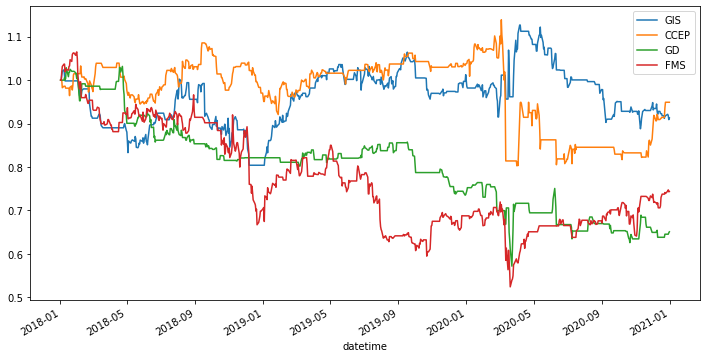

In [6]:
df1 = pd.read_csv(f'data/{stock_name1.value}.csv', parse_dates={'datetime': ['Date']}, index_col=['datetime'])
df2 = pd.read_csv(f'data/{stock_name2.value}.csv', parse_dates={'datetime': ['Date']}, index_col=['datetime'])
df3 = pd.read_csv(f'data/{stock_name3.value}.csv', parse_dates={'datetime': ['Date']}, index_col=['datetime'])
df4 = pd.read_csv(f'data/{stock_name4.value}.csv', parse_dates={'datetime': ['Date']}, index_col=['datetime'])
df = pd.concat([df1['portfolio_value'],
               df2['portfolio_value'],
               df3['portfolio_value'],
               df4['portfolio_value']], axis=1)
df.columns = [stock_name1.value, stock_name2.value, stock_name3.value, stock_name4.value]
log_ret = np.log(df/df.shift(1))

df = df/1000

df.plot(figsize=(12,6))


# fig = plt.figure()
# plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
# plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
# plt.ylabel('Price')
# plt.xlabel('Days')
# plt.title(stock_name1.value)



# def buildmebarchart(i=int):
#     plt.legend(df1.columns, loc=3)
#     plt.plot(df1[stock_name1.value][:i+650].values, color='#0048ff', lw='1', alpha=1);
#     plt.plot(df1[stock_name2.value][:i+650].values, color='#ff1900', lw='1', alpha=1);
#     plt.plot(df1[stock_name3.value][:i+650].values, color='#f2ff00', lw='1', alpha=1);
#     plt.plot(df1[stock_name4.value][:i+650].values, color='#00ff3c', lw='1', alpha=1);

# animator = ani.FuncAnimation(fig, buildmebarchart, interval=50, frames=100)
# HTML(animator.to_jshtml())


In [7]:
sns.set_style('white')

def search(num_ports=1):
    
    global opt_weight
    all_weights = np.zeros((num_ports,len(df.columns)))
    ret_arr = np.zeros(num_ports)
    vol_arr = np.zeros(num_ports)
    sharpe_arr = np.zeros(num_ports)

    for ind in range(num_ports):

        # Create Random Weights
        weights = np.array(np.random.random(4))

        # Rebalance Weights
        weights = weights / np.sum(weights)

        # Save Weights
        all_weights[ind,:] = weights

        # Expected Return
        ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

        # Expected Variance
        vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

        # Sharpe Ratio
        sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
        
    

    opt_weight = all_weights[sharpe_arr.argmax()]
    max_sr_ret = ret_arr[sharpe_arr.argmax()]
    max_sr_vol = vol_arr[sharpe_arr.argmax()]

    plt.figure(figsize=(15,10))
    plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')

    # Add red dot for max SR
    plt.scatter(max_sr_vol,max_sr_ret, c='red', s=100, edgecolors='black')
    
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    

    labels = stock_name1.value, stock_name2.value, stock_name3.value, stock_name4.value
    sizes = opt_weight
    explode = (0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots(figsize=(15,8))
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, colors=['#0048ff','#ff1900','#f2ff00','#00ff3c'])
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

    print(f'Capital: {capital.value}')
    print(f'Investing in stock {stock_name1.value}: {opt_weight[0]*capital.value:.4f}')
    print(f'Investing in stock {stock_name2.value}: {opt_weight[1]*capital.value:.4f}')
    print(f'Investing in stock {stock_name3.value}: {opt_weight[2]*capital.value:.4f}')
    print(f'Investing in stock {stock_name4.value}: {opt_weight[3]*capital.value:.4f}')
    
    
w = interactive(search, num_ports=(1000, 5000, 1000))
display(w);

interactive(children=(IntSlider(value=1000, description='num_ports', max=5000, min=1000, step=1000), Output())…

In [11]:
df.iloc[:,0] = df.iloc[:,0] * (opt_weight[0]*capital.value)
df.iloc[:,1] = df.iloc[:,1] * (opt_weight[1]*capital.value)
df.iloc[:,2] = df.iloc[:,2] * (opt_weight[2]*capital.value)
df.iloc[:,3] = df.iloc[:,3] * (opt_weight[3]*capital.value)

<AxesSubplot:xlabel='datetime'>

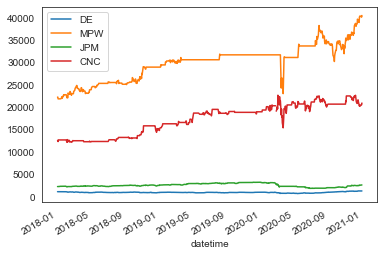

In [12]:
df.plot()

In [13]:
df['return'] = df.sum(axis=1)

<AxesSubplot:xlabel='datetime'>

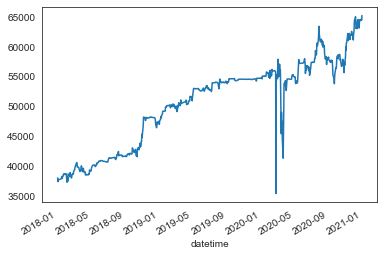

In [14]:
df['return'].plot()

In [15]:
bt_ret = df['return'].pct_change()
bm_ret = df1['benchmark'].pct_change()

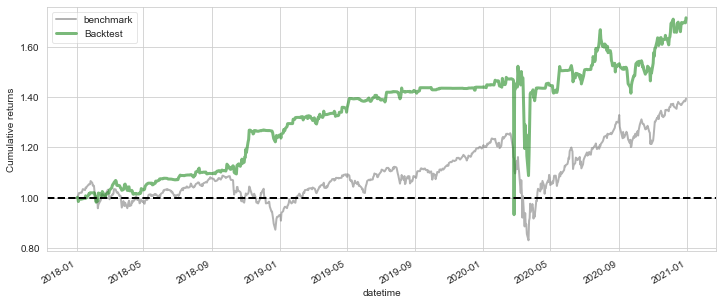

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5));
pf.plotting.plot_rolling_returns(bt_ret, bm_ret);

In [26]:
opt_weight

array([0.02776083, 0.58492416, 0.05796205, 0.32935297])

<AxesSubplot:xlabel='datetime'>

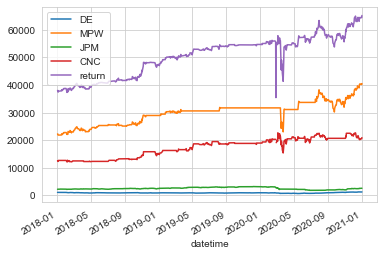

In [3]:
['#206a5d', '#81b214', '#ffcc29', '#f58634', '#d44000', '#864000']*2


['#206a5d',
 '#81b214',
 '#ffcc29',
 '#f58634',
 '#d44000',
 '#864000',
 '#206a5d',
 '#81b214',
 '#ffcc29',
 '#f58634',
 '#d44000',
 '#864000']

In [24]:
def fun1():
    

    fun1.var=5
    
    def fun2():
        fun2.var = 10
        
    fun2()
    
    print(fun2.var)
    

In [25]:
fun1()

10


In [27]:
fun.var

NameError: name 'fun2' is not defined

In [2]:
[0.1]*5


[0.1, 0.1, 0.1, 0.1, 0.1]